In [1]:
from freepaths.scatterers import SinusWave
# from freepaths.scattering import scattering_on_sinus_wave
from matplotlib import pyplot as plt
import numpy as np

In [2]:
WIDTH       = 500e-9
HEIGHT      = 700e-9
RES         = 25

x0=-200e-9
y0=200e-9
a=300e-9
gap=0e-9
deviation=150e-9
thickness=30e-9
tolerance=1e-12

In [3]:
hole = SinusWave(x0=x0, y0=y0, a=a, gap=gap, deviation=deviation, thickness=thickness, tolerance=tolerance)
hole.bounds

(-1.85e-07, 8.5e-08)

(0.0, 4e-07)

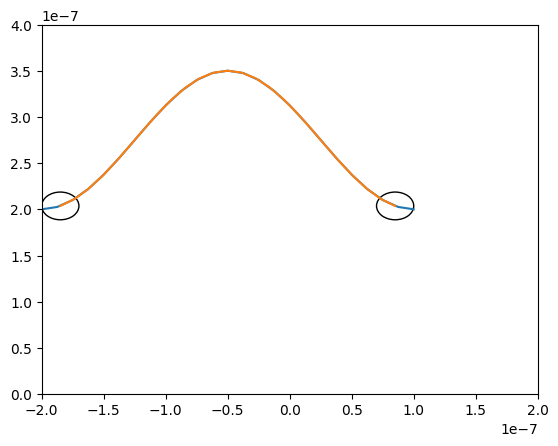

In [4]:
fig, ax = plt.subplots()
xs2 = np.linspace(x0, x0+a, RES)
ys2 = [hole.sin_function(xi)[1] for xi in xs2 ]
plt.plot(xs2, ys2)

# plot line
xs = np.linspace(hole.bounds[0], hole.bounds[1], RES)
# xs = np.linspace(50e-9, 350e-9, RES)
zs = np.zeros(xs.shape)
for i in range(len(xs)):
    xs[i], zs[i] = hole.sin_function(xs[i])


ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[0]),hole.thickness/2, fill=False))
ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[1]),hole.thickness/2, fill=False))

plt.plot(xs, zs)

ax.set_xlim((-200e-9, 200e-9))
ax.set_ylim((0, 400e-9))



In [5]:
from math import pi, cos, sin, tan, exp, sqrt, atan, asin, acos, ceil
from random import random
from numpy import sign, array, linspace, abs, where, diff
from numpy.linalg import norm
from scipy.optimize import bisect

In [6]:
def scattering_on_sinus_wave(ph, box, sin_function, grad_function, tolerance, bounds, thickness, scattering_types, xa, ya, z):
    """Check if phonon strikes sinus wave and calculate new direction"""
    
    # first fast selection
    # if box[0] < x and x < box[1] and box[2] < y and y < box[3]:
    if True:
        # possibly inside the wave
        
        closest_distance = 100
        closest_point = (0,0)
        
        # check distance to leftmost point
        leftmost_point = sin_function(bounds[0])        
        distance = norm(array([xa, ya]) - array(leftmost_point))
        print(leftmost_point, distance)
        if distance < closest_distance:
            closest_distance = distance
            closest_point = leftmost_point
        
        # check distance to righmost point
        rightmost_point = sin_function(bounds[1])
        distance = norm(array([xa, ya]) - array(rightmost_point))
        print(rightmost_point, distance)
        if distance < closest_distance:
            closest_distance = distance
            closest_point = closest_point
        
        # check distance to function
        # check number of sign changes within a certain tolerance
        # (if there are multiple sign changes but they are close enough we will just choose one at random)
        
        eval_points = linspace(bounds[0], bounds[1], ceil((bounds[1]-bounds[0])/tolerance))
        # eval_results = [norm(array([xa, ya]) - array(sin_function(xi))) for xi in eval_points]
        # distance = min(eval_results)
        # if distance < closest_distance:
        #     closest_distance = distance
        #     closest_point = (sin_function(eval_points[where(eval_results == distance)[0]]))
        
        eval_results = [grad_function(xi, xa, ya) for xi in eval_points]
        signs = sign(eval_results)
        sign_change_indices = where(diff(signs) != 0)[0]
        print(sign_change_indices)
        
        for sign_change in sign_change_indices:
            eval_x = eval_points[sign_change]
            point = sin_function(eval_x)
            distance = norm(array([xa, ya]) - array(point))
            print(point, distance, closest_distance)
            if distance < closest_distance:
                closest_distance = distance
                closest_point = point

        if distance < thickness/2:
            # definetly inside wave

            # can use scattering on circular hole once closest point has been determined
            # scattering_on_circular_holes(ph, closest_point[0], closest_point[1], thickness/2, scattering_types, x, y, z)
            return True, closest_distance, closest_point, eval_points, eval_results
        else:
            return False, closest_distance, closest_point, eval_points, eval_results
        
    else:
        # definetly outside the wave
        return False, -1, (0,0), (1), (1)

# plot grid
xs, ys = np.meshgrid(np.linspace(-WIDTH/2, WIDTH/2, RES), np.linspace(0, HEIGHT, RES))
x, y = [], []
for xi, yi in zip(np.nditer(xs), np.nditer(ys)):
    bol, dist = scattering_on_sinus_wave(_, hole.box, hole.sin_function, hole.grad_function, hole.tolerance, hole.bounds, hole.thickness, _, xi, yi, 0)
    if bol:
        x.append(xi)
        y.append(yi)

plt.scatter(x, y)

[-1.85000000e-07  2.03670761e-07] 1.427284076859709e-07
[8.50000000e-08 2.03670761e-07] 1.4272840768597088e-07
[ 70859 134999 199139]
[-1.14140738e-07  2.91911012e-07] 7.661962636980577e-08 1.4272840768597088e-07
[-5.00005e-08  3.50000e-07] 9.99999999971376e-08 7.661962636980577e-08
[1.41397376e-08 2.91912542e-07] 7.661962635776452e-08 7.661962636980577e-08
False 7.661962635776452e-08 [1.41397376e-08 2.91912542e-07]


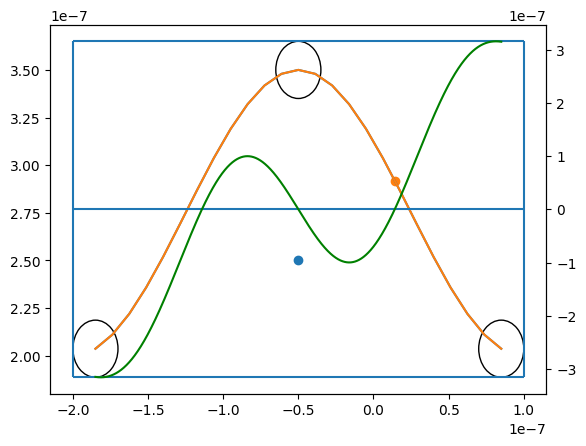

In [11]:
# plot line
# xs = np.linspace(50e-9, 350e-9, RES)


fig, ax = plt.subplots()

ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[0]),hole.thickness/2, fill=False))
ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[1]),hole.thickness/2, fill=False))
ax.add_patch(plt.Circle(hole.sin_function(sum(hole.bounds)/2),hole.thickness/2, fill=False))


plt.plot(xs, zs)
xs = np.linspace(hole.bounds[0], hole.bounds[1], RES)

# xs = np.linspace(50e-9, 350e-9, RES)
zs = np.zeros(xs.shape)
for i in range(len(xs)):
    xs[i], zs[i] = hole.sin_function(xs[i])
ax.plot(xs, zs)

# ax.set_xlim((-200e-9, 200e-9))
# ax.set_ylim((0e-9, 400e-9))


POINT = (-50e-9, 250e-9)
ax.scatter(POINT[0], POINT[1])

bol, dist, clos, poi, res = scattering_on_sinus_wave(_, hole.box, hole.sin_function, hole.grad_function, hole.tolerance, hole.bounds, hole.thickness, _, POINT[0], POINT[1], 0)
print(bol, dist, clos)
ax.scatter(clos[0], clos[1])

ax.hlines(hole.box[-2:], hole.box[0], hole.box[1])
ax.vlines(hole.box[:2], hole.box[2], hole.box[3])

ax2 = ax.twinx()
ax2.hlines((0), hole.box[0], hole.box[1])
ax2.plot(poi,res, color='green')

In [8]:
from scipy.optimize import minimize

In [9]:

fan = lambda z: np.linalg.norm(np.array(POINT)-np.array(hole.sin_function(z)))
m = minimize(fan, hole.bounds)
m

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3.7850771367715417e-07
        x: [-2.033e-07  2.880e-07]
      nit: 7
      jac: [ 5.782e-03 -6.019e-04]
 hess_inv: [[ 3.268e-08  3.601e-09]
            [ 3.601e-09  9.593e-08]]
     nfev: 153
     njev: 47

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

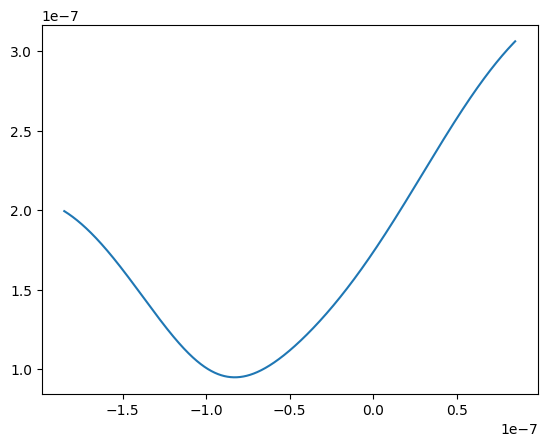

In [10]:
dissis = [np.linalg.norm(np.array(POINT)-np.array(hole.sin_function(xi))) for xi in poi]
plt.plot(poi, dissis)
plt.scatter()

In [ ]:
import numpy

In [ ]:
POINT = [0, -500e-9]

for i in [0, 5e-9, 5e-8, 1, 1000]:
    POINT[0] = i
    
    fu = lambda x_l: 2*(x_l-POINT[0])+(2*numpy.pi*numpy.sin(2*numpy.pi*(x_l-x)/(le+gap)) * (y-POINT[1]-(numpy.cos((2*numpy.pi*(x_l-x))/(le+gap))-1)/(2*deviation)))/(deviation*(le+gap))

    # xs = np.linspace(hole.bounds[0]+200-9, hole.bounds[1]-200e-9, RES)
    xs = np.linspace(-200e-9, 200e-9, RES)
    ys = [fu(x) for x in xs]
    plt.plot(xs, ys)
    root = bisect(fu, -100e-9, 100e-9)
    plt.scatter(root, 0)
    print(root)

plt.plot(xs, [0.0]*len(xs))

In [ ]:
[0]*len(xs)